### Calculate the loss and its gradient with respect to the weights

In [1]:
import numpy as np

In [41]:
#Softmax_j(S) = sigma_j(S) = ( e^(S_j) / sum(e^(S_k)) )
def softmax(S):
    expS = np.exp(S)
    return expS/expS.sum(axis=0)

In [49]:
hw = 4   # 4 pixels in an image
n  = 5   # 5 images
c  = 3   # 3 classes


X  = np.random.rand( hw, n )
y  = np.random.choice( np.arange(c), n )

WT = np.random.randn( c, hw )

#forward pass for the loss itself
# @ == np.dot(WT, X)

S  = WT@X
P  = softmax(S)
Py = P[ y, np.arange(n) ]
l = -np.log(Py)
L = l.sum()

dLdl = np.ones_like( l )

dLdP = np.ones_like( P )
dLdP[ y, np.arange(n) ] = -1/Py

dLdS = np.zeros_like( S )
for k in range( c ):
    dLdS += dLdP[k]*(-P[k]*P)

dLdS += dLdP*P

dLdWT = dLdS@X.T
#print(dLdWT)

In [80]:
def loss(WT, X, y):
    
    # forward pass for the loss itself

    S = WT@X
    P = softmax(S)
    Py = P[ y , np.arange(n) ] # need the yith row of each column i of P
    l = -np.log(Py)
    L = l.sum()

    # back-propagation of the gradient
    dLdl = np.ones_like( l )

    dLdP = np.zeros_like( P )
    dLdP[ y , np.arange(n) ] = -1/Py
    #print(y)
    #dLdP

    dLdS = np.zeros_like( S )
    for k in range( c ):
        dLdS += dLdP[k]*(-P[k]*P)
    dLdS += dLdP*P

    dLdWT = dLdS@X.T
    #print(dLdWT)
    
    return L, dLdWT  # loss itself and its gradient


In [81]:
hw = 4   # 4 pixels in an image
n  = 5   # 5 images
c  = 3   # 3 classes

np.random.seed(1177)
X  = np.random.rand( hw, n )
y  = np.random.choice( np.arange(c), n )

WT = np.random.randn( c, hw )

loss(WT, X, y)

(10.00429886377675,
 array([[ 0.60673359,  1.28883337,  0.2889544 ,  1.63608426],
        [-1.3524243 , -2.15481671, -0.74912237, -2.194329  ],
        [ 0.74569071,  0.86598335,  0.46016798,  0.55824475]]))

In [82]:
def fd_approx(WT, X, y, j, q):
    L0,_ = loss( WT, X, y ) # loss at base point
    delta = 1e-8 # small but not too small
    WT1 = WT.copy()
    WT1[j, q] += delta
    L1,_ = loss( WT1, X, y )
    return (L1-L0)/delta # approx of j,q component of gradient

In [83]:
L, g = loss(WT, X, y)
print(g[2,3])
print( fd_approx(WT,X,y,2,3) )

0.55824474702366
0.5582446505059124


In [157]:
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [86]:
def charclass(png):
    return png.split('__')[1][:-4]

h,w = 125, 100
#a legitimate test on some other images
pngs = sorted(glob('pngs/*.png'))
selection = sorted( {charclass(png) for png in pngs} )

X = np.empty((h*w, len(pngs)))
for i,png in enumerate(pngs):
    X[:,i] = 255-np.array(Image.open(png))[:,:,0].reshape(h*w)
X /= X.sum()

y = [selection.index(charclass(png)) for png in pngs]

In [124]:
n = len(pngs)
c = len(selection)
hw = h*w
WT = np.zeros( (c,hw) )

#get loss and its gradient
L,gradL = loss( WT, X, y )

In [125]:
L, gradL.min()

(3486.1138307929855, -8.86531773315573e-05)

In [153]:
#change the weights by a multiple "stepsize" of the negative gradient
stepsize = 10000000
WT -= stepsize*gradL
L, gradL = loss(WT, X, y)
L

4935.934578642727

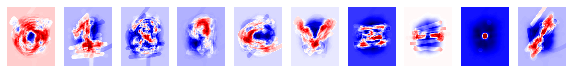

In [166]:
plt.figure(figsize=(10,10))
for j in range(c):
    plt.subplot(1, c, j+1)
    plt.imshow( WT[j].reshape((h,w)), cmap='seismic' )
    plt.axis('off')